In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Scikit-learn version: ", sklearn.__version__)
np.random.seed(324)

Pandas version:  2.1.4
Numpy version:  1.26.3
Scikit-learn version:  1.4.0


In [2]:
#column_names = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)]

df = pd.read_csv(r"C:\Users\liphn\Desktop\CMaps\train_FD001.txt", sep = "\s+", header = None)
df.shape

(20631, 26)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,21.61,550.79,2388.26,9061.48,1.3,48.20,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [5]:
np.unique(df[0])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [6]:
num_cycles_to_failure = df.groupby(0)[1].count()
num_cycles_to_failure.values

array([192, 287, 179, 189, 269, 188, 259, 150, 201, 222, 240, 170, 163,
       180, 207, 209, 276, 195, 158, 234, 195, 202, 168, 147, 230, 199,
       156, 165, 163, 194, 234, 191, 200, 195, 181, 158, 170, 194, 128,
       188, 216, 196, 207, 192, 158, 256, 214, 231, 215, 198, 213, 213,
       195, 257, 193, 275, 137, 147, 231, 172, 185, 180, 174, 283, 153,
       202, 313, 199, 362, 137, 208, 213, 213, 166, 229, 210, 154, 231,
       199, 185, 240, 214, 293, 267, 188, 278, 178, 213, 217, 154, 135,
       341, 155, 258, 283, 336, 202, 156, 185, 200], dtype=int64)

In [7]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25],
      dtype='int64')

In [8]:
def process_targets(data_length, early_rul = None):
    """ 
    Takes datalength (total number of cycles for each engine) and early_rul as input and creates target rul.    
    Arguments:
        data_length: (scaler) Number of cycles for each engine
        early_rul: (scaler) Early RUL value to be set. When set to `None`, linear degradation
                   curve is used. (deafult: None)
    Returns:
        target_array: (1D float array) Target array
    """
    if early_rul == None:
        return np.arange(data_length-1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0:    
            target_array = np.arange(data_length-1, -1, -1)
            return target_array
        else:
            target_array = np.append(early_rul*np.ones(shape = (early_rul_duration,)), np.arange(early_rul-1, -1, -1))
            return target_array

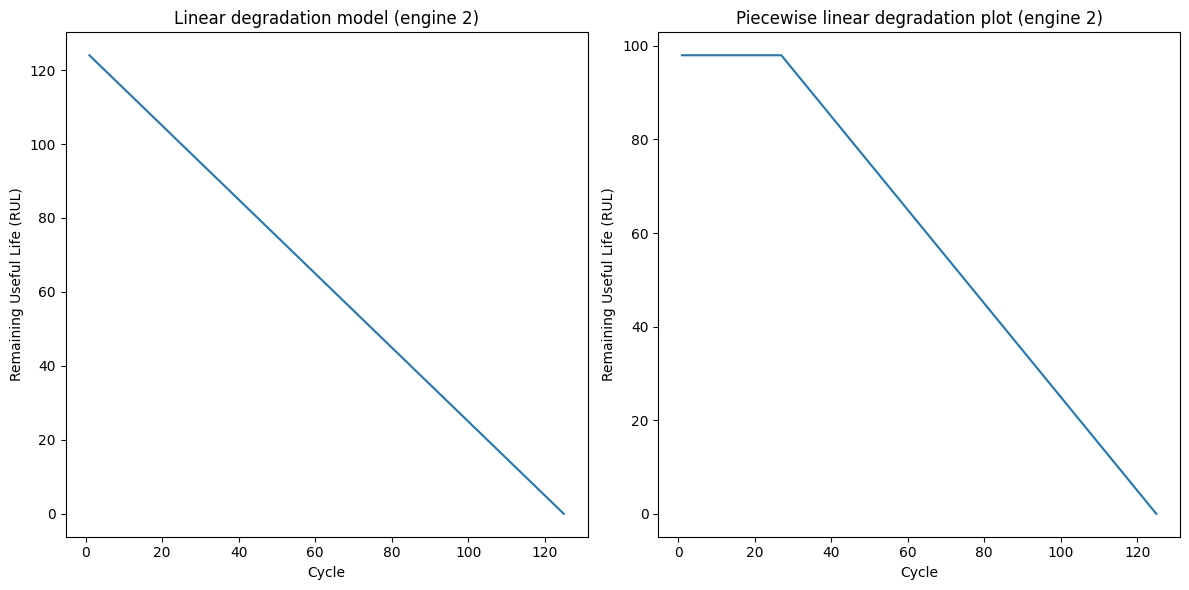

In [9]:
engine_2_linear_degradation_rul = process_targets(125, early_rul = None)
engine_2_piecewise_linear_degradation_rul = process_targets(125, early_rul = 98)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(np.arange(1, len(engine_2_linear_degradation_rul) + 1), engine_2_linear_degradation_rul)
plt.title("Linear degradation model (engine 2)")
plt.xlabel("Cycle")
plt.ylabel("Remaining Useful Life (RUL)")

plt.subplot(122)
plt.plot(np.arange(1, len(engine_2_piecewise_linear_degradation_rul) + 1), engine_2_piecewise_linear_degradation_rul)
plt.title("Piecewise linear degradation plot (engine 2)")
plt.xlabel("Cycle")
plt.ylabel("Remaining Useful Life (RUL)")

plt.tight_layout()
plt.show()

In [10]:
df2 = pd.read_csv(r"C:\Users\liphn\Desktop\CMaps\test_FD001.txt", sep = "\s+", header = None)
df2.shape

(13096, 26)

In [11]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [12]:
df2.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699
13095,100,198,0.0013,0.0003,100.0,518.67,642.95,1601.62,1424.99,14.62,21.61,552.48,2388.06,9155.03,1.3,47.80,521.07,2388.05,8214.64,8.4903,0.03,396,2388,100.0,38.70,23.1855


In [13]:
np.unique(df2[0])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [14]:
df2.groupby(0)[1].count().values

array([ 31,  49, 126, 106,  98, 105, 160, 166,  55, 192,  83, 217, 195,
        46,  76, 113, 165, 133, 135, 184, 148,  39, 130, 186,  48,  76,
       140, 158, 171, 143, 196, 145,  50, 203, 198, 126, 121, 125,  37,
       133, 123, 156, 172,  54, 152, 146,  73,  78, 303,  74, 144, 189,
       164, 121, 113, 136, 160, 176,  94, 147, 159, 232, 155, 168,  71,
       147,  71, 187,  54, 152,  68, 131, 112, 137,  88, 205, 162,  72,
       101, 133, 213, 162,  73, 172,  34, 110,  56,  68, 177, 146, 234,
       150, 244, 133,  89,  97, 134, 121,  97, 198], dtype=int64)

In [15]:
true_rul = pd.read_csv(r'C:\Users\liphn\Desktop\CMaps\RUL_FD001.txt', sep = '\s+', header = None)
true_rul[0].values

array([112,  98,  69,  82,  91,  93,  91,  95, 111,  96,  97, 124,  95,
       107,  83,  84,  50,  28,  87,  16,  57, 111, 113,  20, 145, 119,
        66,  97,  90, 115,   8,  48, 106,   7,  11,  19,  21,  50, 142,
        28,  18,  10,  59, 109, 114,  47, 135,  92,  21,  79, 114,  29,
        26,  97, 137,  15, 103,  37, 114, 100,  21,  54,  72,  28, 128,
        14,  77,   8, 121,  94, 118,  50, 131, 126, 113,  10,  34, 107,
        63,  90,   8,   9, 137,  58, 118,  89, 116, 115, 136,  28,  38,
        20,  85,  55, 128, 137,  82,  59, 117,  20], dtype=int64)

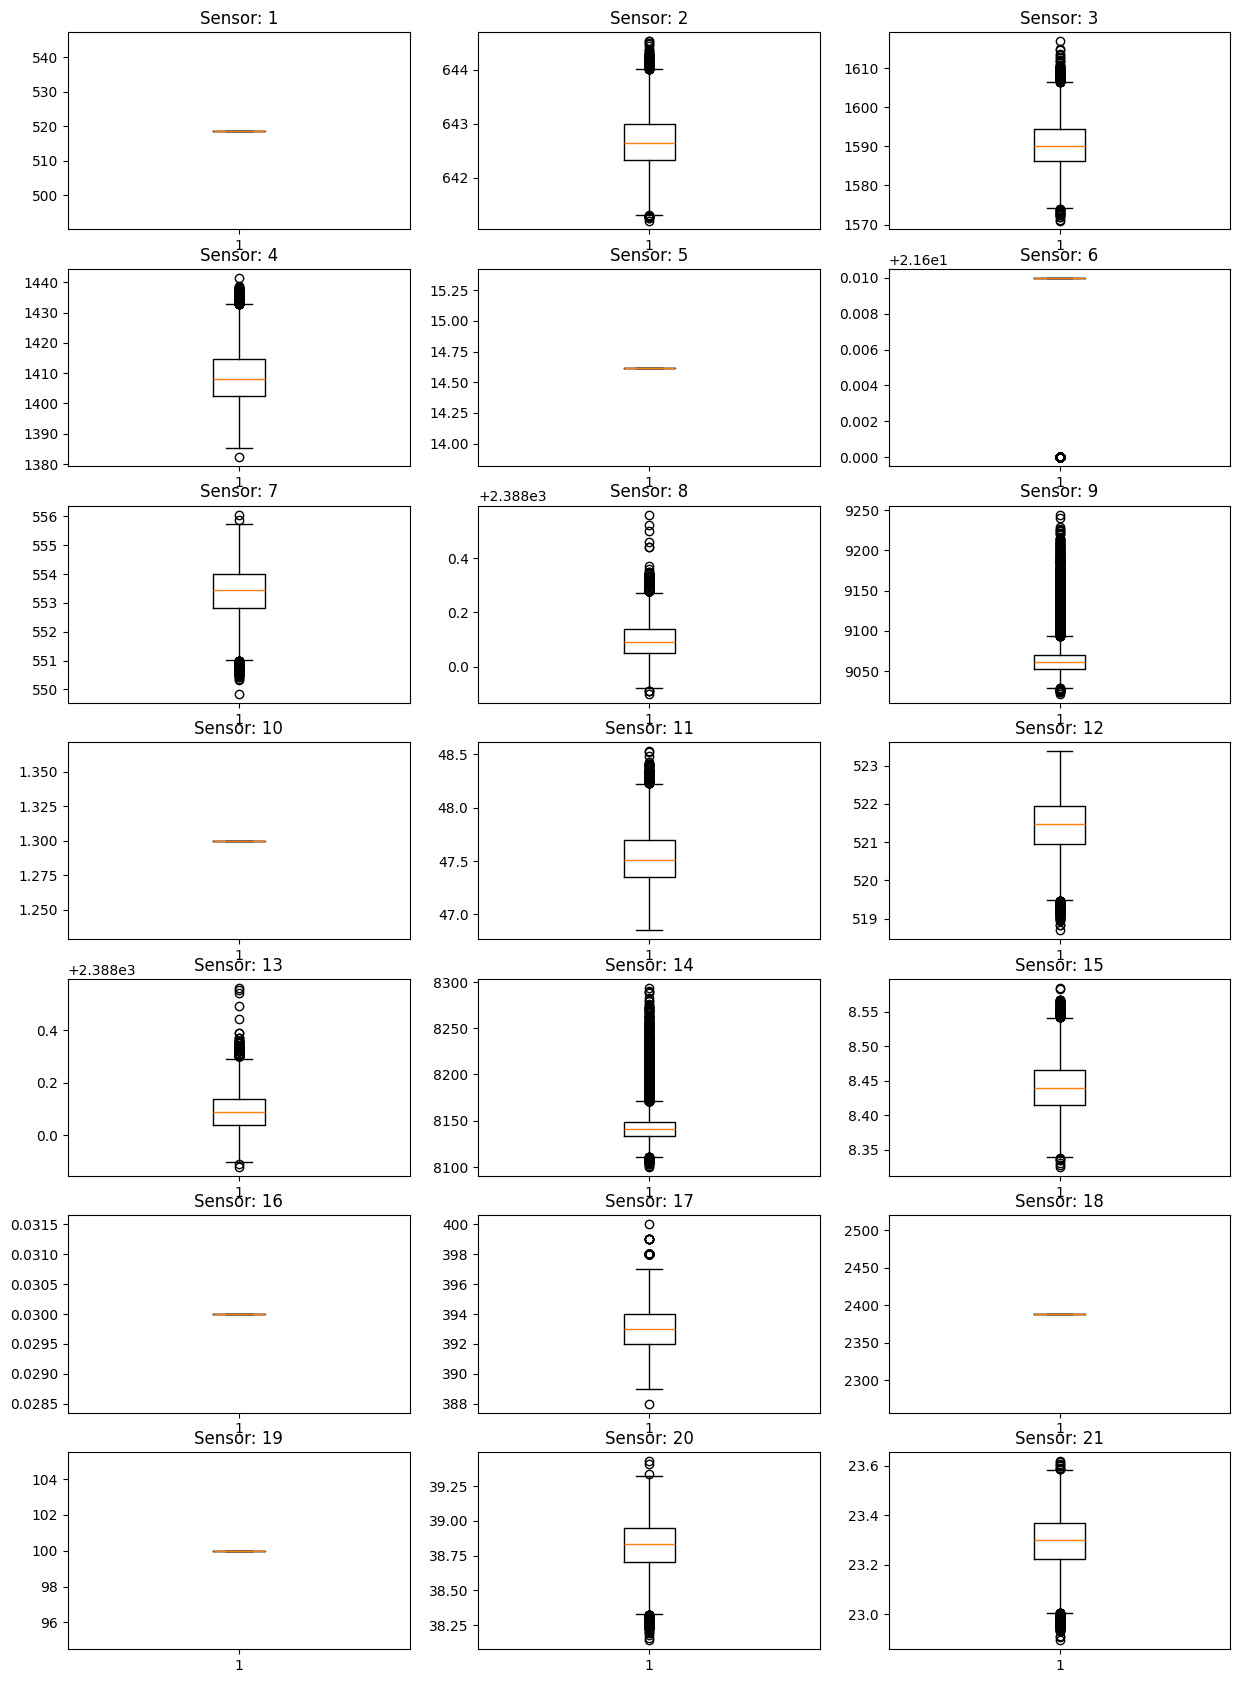

In [16]:
#Remove engine unit number and cycle infomation, operational settings.

#Visualize sensor data.

# box plots for sensor measurements (columns 5-25, total 21 columns)
plt.figure(figsize = (15, 21))
# column 5 in python means actual 6th column
for i in np.arange(5, 26):        
    temp = df.iloc[:, i]
    plt.subplot(7, 3, i-4)
    plt.boxplot(temp)
    plt.title("Sensor: "+ str(i-4))
plt.show()

In [17]:
#Sensor 1, 5, 6, 10, 16, 18, 19 have constant number.
#Constant Values dont help in training.

#df[9].value_counts()
df[10].value_counts()
#df[14].value_counts()
#df[20].value_counts()

10
21.61    20225
21.60      406
Name: count, dtype: int64

In [18]:
def process_input_data_with_targets(input_data, target_data = None, window_length = 1, shift = 1):
    """
    Depending on values of window_length and shift, this function generates batchs of data and targets 
    from `input_data` and `target_data`. `target_data` is optional. If no `target_data` is given, i.e., 
    `target_data = None`, no `output_targets` are generated. The following formula is used to determine
    number of batches:    
        Number of batches = int(np.floor((len(input_data) - window_length)/shift)) + 1    
    **We don't check input dimensions using exception handling. So readers should be careful while using these
    functions. If input data are not of desired dimension, either error occurs or something undesirable is 
    produced as output.**    
    Arguments:
        input_data: (Must be 2D array) input data to function 
        target_data (optional): (Must be 1D array) Input rul values (default: None)
        window_length: (scalar) window length of data (default: 1)
        shift: (scalar) Distance by which the window moves for next batch. This is closely related to overlap
               between data. For example, if window length is 30 and shift is 1, there is an overlap of 
               29 data points between two consecutive batches (default: 1)        
    Returns:
        output_data: (2D float array) Output data that would be passed to machine learning model
        output_targets (optional): (1D float array) Output targets. Only generated if `target_data` is
                                   passed as argument.
    """
    num_batches = int(np.floor((len(input_data) - window_length)/shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.repeat(np.nan, repeats = num_batches * window_length * num_features) \
                    .reshape(num_batches, window_length, num_features)
    if target_data is None:
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
        return output_data
    else:
        output_targets = np.repeat(np.nan, repeats=num_batches)
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
            output_targets[batch] = target_data[(shift*batch + (window_length-1))]
        return output_data, output_targets

In [19]:
def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows = 1):
    """ 
    This function takes test data for an engine as first input. The next two inputs,
    window_length and shift are same as other functions. Finally it takes num_test_windows as
    the last input. num_test_windows sets how many examples we want from test data (from last).
    By default it extracts only the last example. The function returns last examples and number
    of last examples (a scaler) as output. We need the second output later. If we are extracting
    more than 1 last examples, we have to average their prediction results. The second scaler helps us do just that.
    Arguments:
        test_data_for_an_engine: (2D array) input test data
        window_length: (scalar) window length of data
        shift: (scalar) Distance by which the window moves for next batch. This is closely related to overlap
               between data. For example, if window length is 30 and shift is 1, there is an overlap of 
               29 data points between two consecutive batches.
        num_test_windows: (scalar) Number of examples to take from last. (default: 1)
    Returns:
        batched_test_data_for_an_engine: (2D array) Batched test data. Please note that, here we have used the term `batch`
                                         in a different sense than its usual meaning in deep learning.
        extracted_num_test_windows: (scalar) Extracted number of test examples from last. If `num_test_windows` number of
                                    examples can't be extracted from test data, in that case `extracted_num_test_windows`
                                    is less than `num_test_windows`. 
    """
    max_num_test_batches = int(np.floor((len(test_data_for_an_engine) - window_length)/shift)) + 1
    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        extracted_num_test_windows = max_num_test_batches
        return batched_test_data_for_an_engine, extracted_num_test_windows
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        extracted_num_test_windows = num_test_windows
        return batched_test_data_for_an_engine, extracted_num_test_windows

In [20]:
window_length = 1
shift = 1
early_rul = 125             # Set to None for linear degradation model
processed_train_data = []
processed_train_targets = []
# How many test examples to take for each engine. If set to 1 (this is the default), only last example of test data for 
# each engine are taken. If set to a different number, that many examples from last are taken. 
# Final output for an engine will be the average of output of all examples for that engine.
num_test_windows = 5   # Number of examples. Choose a different number to select that many test examples for each engine.
processed_test_data = []
num_test_windows_list = []  # This list keeps track of number of examples for all engines in the test set.
columns_to_be_dropped = [0,1,2,3,4,5,9,10,14,20,22,23]
num_machines = np.min([len(df[0].unique()), len(df2[0].unique())])

for i in np.arange(1, num_machines + 1):    
    temp_train_data = df[df[0] == i].drop(columns=columns_to_be_dropped).values
    temp_test_data = df2[df2[0] == i].drop(columns=columns_to_be_dropped).values    
    # Verify if data of given window length can be extracted from both training and test data
    if (len(temp_test_data) < window_length):
        print("Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
    elif (len(temp_train_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.") 
    temp_train_targets = process_targets(data_length = temp_train_data.shape[0], early_rul = early_rul)
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets, 
                                                                                window_length=window_length, shift=shift)    
    # Prepare test data
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length=window_length, shift=shift,
                                                             num_test_windows = num_test_windows)    
    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)    
    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)
processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

# Shuffle data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

print(processed_train_data.shape)
print(processed_train_targets.shape)
print(processed_test_data.shape)
print(true_rul.shape)

(20631, 1, 14)
(20631,)
(500, 1, 14)
(100,)


In [21]:
processed_train_data = processed_train_data.reshape(-1, processed_train_data.shape[2])
processed_test_data = processed_test_data.reshape(-1, processed_test_data.shape[2])
print("Processed train data shape: ", processed_train_data.shape)
print("Processed test data shape: ", processed_test_data.shape)

Processed train data shape:  (20631, 14)
Processed test data shape:  (500, 14)


In [22]:
rf_model = RandomForestRegressor(n_estimators= 150, max_features = "sqrt",
                                 n_jobs = -1, random_state = 32)
rf_model.fit(processed_train_data, processed_train_targets)
rul_pred = rf_model.predict(processed_test_data)
# First split predictions according to number of windows of each engine
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows)) 
                             for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]


In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(true_rul, mean_pred_for_each_engine)

# Calculate R-squared
r2 = r2_score(true_rul, mean_pred_for_each_engine)

RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))

print("RMSE: ", RMSE)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)


RMSE:  19.01973068765989
Mean Absolute Error:  14.288599999999999
R-squared:  0.7905168083153984


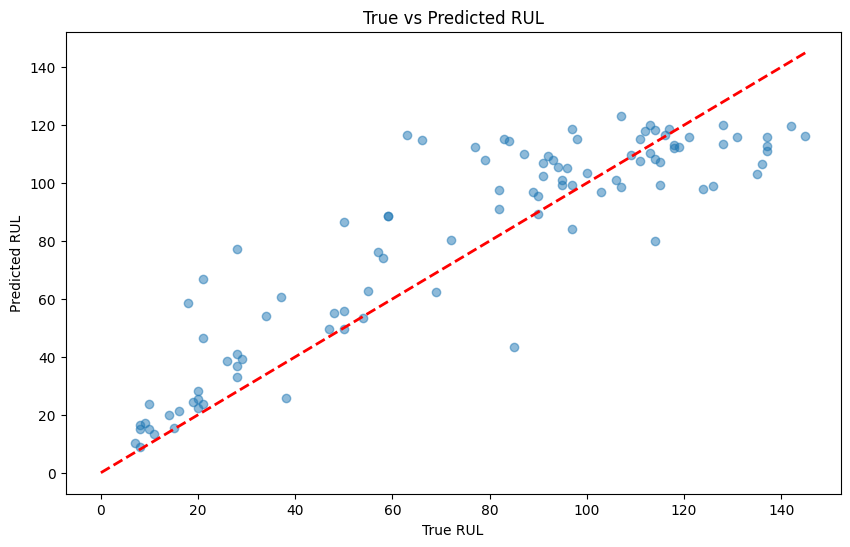

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(true_rul, mean_pred_for_each_engine, alpha=0.5)
plt.plot([0, max(true_rul)], [0, max(true_rul)], '--', color='red', linewidth=2)  # Diagonal line for reference
plt.title("True vs Predicted RUL")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.show()


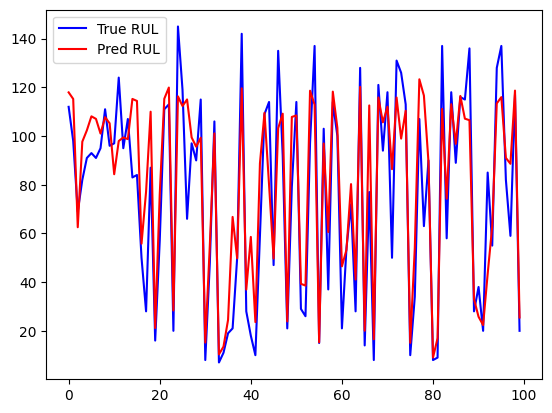

In [25]:
plt.plot(true_rul, label = "True RUL", color = "blue")
plt.plot(mean_pred_for_each_engine, label = "Pred RUL", color = "red")
plt.legend()
plt.show()

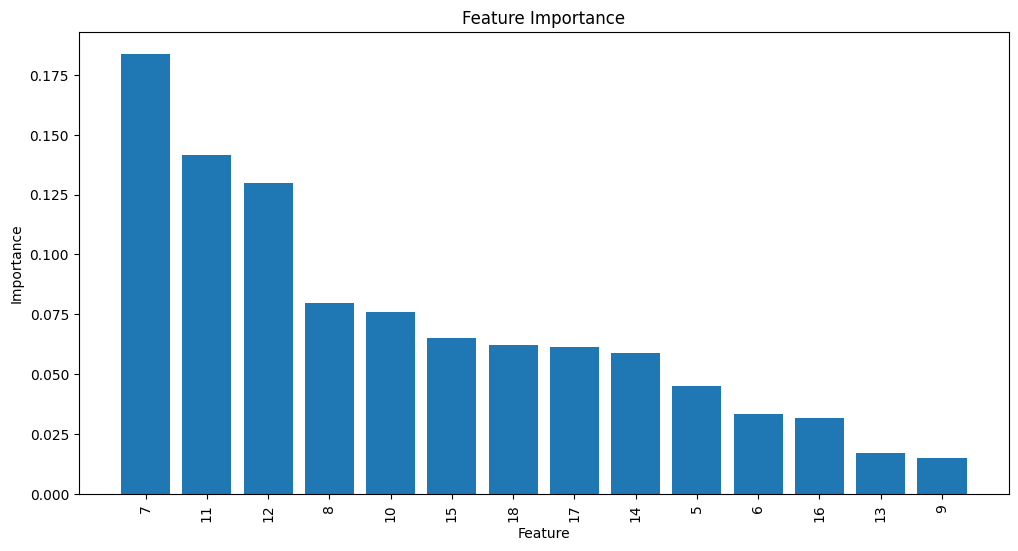

In [26]:
feature_importance = rf_model.feature_importances_
feature_names = df.columns[5:-6]  # Assuming the relevant sensor measurements start from column 6
sorted_idx = np.argsort(feature_importance)[::-1]

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation='vertical')
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [27]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_features': ['sqrt', 'log2']}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(processed_train_data, processed_train_targets)

# Best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [28]:
# Use the best estimator for predictions
best_rf_model = grid_search.best_estimator_
#best_rul_pred = best_rf_model.predict(processed_test_data)


best_rf_model.fit(processed_train_data, processed_train_targets)
rul_pred = best_rf_model.predict(processed_test_data)
# First split predictions according to number of windows of each engine
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows)) 
                             for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]


RMSE:  19.259824941168198
Mean Absolute Error:  14.497693333333336
R-squared:  0.785194633825018


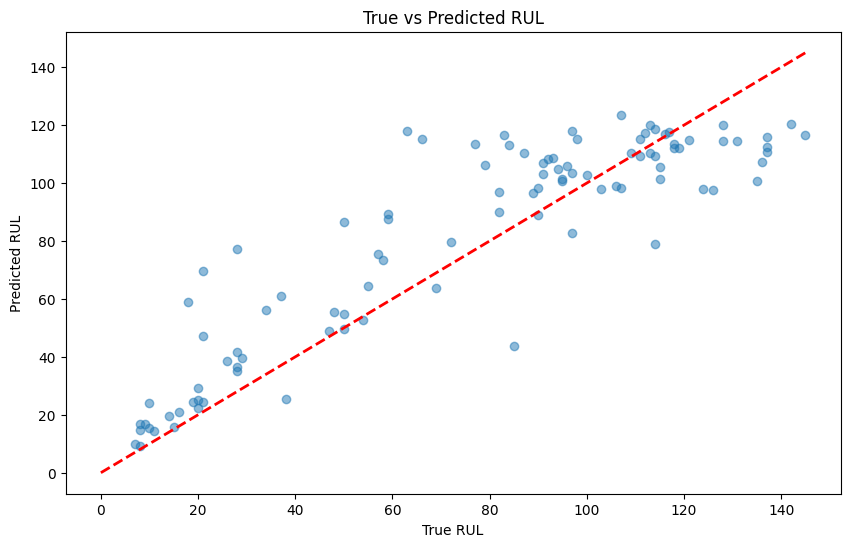

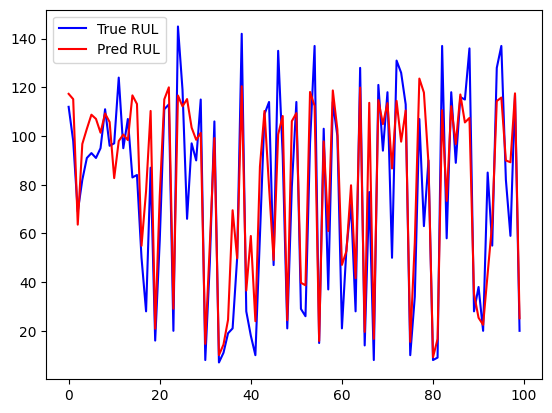

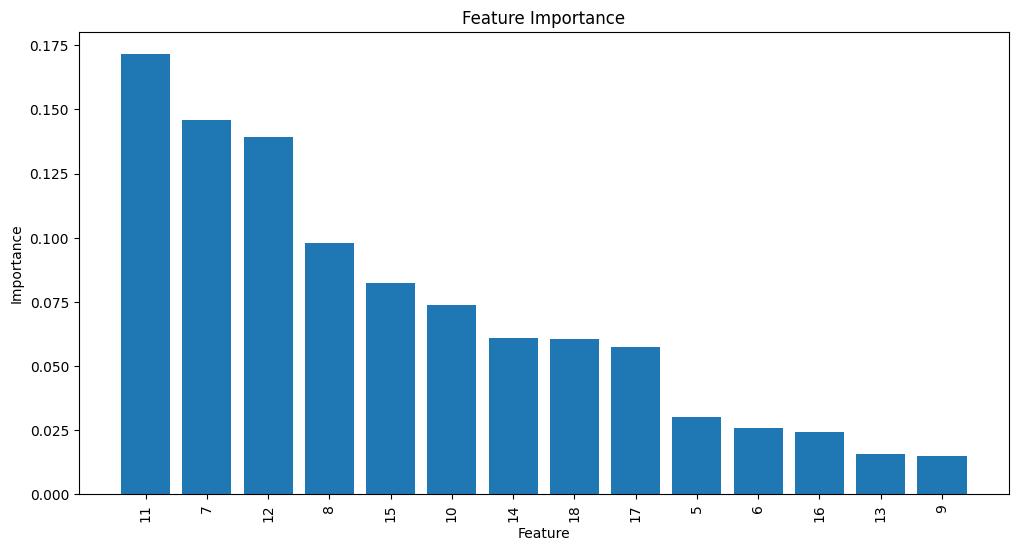

In [29]:
# First split predictions according to the number of windows of each engine
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])

# Calculate the mean prediction for each engine
mean_pred_for_each_engine = [
    np.average(ruls_for_each_engine, weights=np.repeat(1 / num_windows, num_windows))
    for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)
]

# Evaluate the performance
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
mae = mean_absolute_error(true_rul, mean_pred_for_each_engine)
r2 = r2_score(true_rul, mean_pred_for_each_engine)

print("RMSE: ", RMSE)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(true_rul, mean_pred_for_each_engine, alpha=0.5)
plt.plot([0, max(true_rul)], [0, max(true_rul)], '--', color='red', linewidth=2)  # Diagonal line for reference
plt.title("True vs Predicted RUL")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.show()

plt.plot(true_rul, label="True RUL", color="blue")
plt.plot(mean_pred_for_each_engine, label="Pred RUL", color="red")
plt.legend()
plt.show()

# Feature Importance
feature_importance = best_rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Plotting feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation='vertical')
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [113]:
import requests

# Choose a random row from the processed train data
random_index = np.random.choice(processed_test_data.shape[0])

# Select the features for the chosen row
random_row_features = processed_train_data[random_index, :].reshape(1, -1)

# Make predictions using the trained model
random_row_rul_prediction = best_rf_model.predict(random_row_features)

rounded_rul_prediction = np.round(random_row_rul_prediction[0])

# Check for failure or pass based on a threshold
failure_threshold = 75  # Adjust the threshold based on your problem
failure_status = rounded_rul_prediction <= failure_threshold

# Print the results
print(f"Randomly picked row index: {random_index}")
print(f"Remaining Useful Life (RUL) Prediction: {rounded_rul_prediction}")
print(f"Failure Status: {'Fail' if failure_status else 'Pass'}")


# If failure, identify the sensor causing the failure
if failure_status:
    # Calculate the contribution of each sensor to the failure prediction
    sensor_contributions = best_rf_model.predict(random_row_features) - best_rf_model.predict(random_row_features - np.eye(len(feature_names))[:, :-1])
    
    # Identify the sensor with the maximum contribution
    sensor_failure_index = np.argmax(sensor_contributions)
    sensor_failure_name = feature_names[sensor_failure_index]
    
    print(f"Sensor causing failure: {sensor_failure_name}")

    # ThingSpeak Configuration
    thingspeak_url = "https://api.thingspeak.com/update"
    api_key = "G3DFNNJZRZZM5ARI"


data = {"api_key": api_key, "field1": rounded_rul_prediction, "field2": sensor_failure_name}
response = requests.post(thingspeak_url, params=data)

Randomly picked row index: 74
Remaining Useful Life (RUL) Prediction: 2.0
Failure Status: Fail
Sensor causing failure: 17


In [79]:
import requests
import time

# ThingSpeak Configuration
thingspeak_url = "https://api.thingspeak.com/update"
api_key = "G3DFNNJZRZZM5ARI"

# Run the code for 5 iterations
for _ in range(20):
    # Choose a random row from the processed test data
    random_index = np.random.choice(processed_test_data.shape[0])

    # Select the features for the chosen row
    random_row_features = processed_train_data[random_index, :].reshape(1, -1)

    # Make predictions using the trained model
    random_row_rul_prediction = best_rf_model.predict(random_row_features)

    rounded_rul_prediction = np.round(random_row_rul_prediction[0])

    # Check for failure or pass based on a threshold
    failure_threshold = 75  # Adjust the threshold based on your problem
    failure_status = rounded_rul_prediction <= failure_threshold

    # Print the results
    print(f"Randomly picked row index: {random_index}")
    print(f"Remaining Useful Life (RUL) Prediction: {rounded_rul_prediction}")
    print(f"Failure Status: {'Fail' if failure_status else 'Pass'}")

    data = {"api_key": api_key, "field1": rounded_rul_prediction}
    # Send Data to ThingSpeak
    response = requests.post(thingspeak_url, params=data)

    # If failure, identify the sensor causing the failure
    if failure_status:
        # Calculate the contribution of each sensor to the failure prediction
        sensor_contributions = best_rf_model.predict(random_row_features) - best_rf_model.predict(random_row_features - np.eye(len(feature_names))[:, :-1])

        # Identify the sensor with the maximum contribution
        sensor_failure_index = np.argmax(sensor_contributions)
        sensor_failure_name = feature_names[sensor_failure_index]

        print(f"Sensor causing failure: {sensor_failure_name}")

        # Prepare Data Payload
        data = {"api_key": api_key, "field2": sensor_failure_name}
        # Send Data to ThingSpeak
        response = requests.post(thingspeak_url, params=data)

    # Delay between iterations (adjust as needed)
    time.sleep(15)  # 5 seconds delay between iterations


Randomly picked row index: 203
Remaining Useful Life (RUL) Prediction: 105.0
Failure Status: Pass
Randomly picked row index: 353
Remaining Useful Life (RUL) Prediction: 8.0
Failure Status: Fail
Sensor causing failure: 18
Randomly picked row index: 240
Remaining Useful Life (RUL) Prediction: 46.0
Failure Status: Fail
Sensor causing failure: 12
Randomly picked row index: 441
Remaining Useful Life (RUL) Prediction: 120.0
Failure Status: Pass
Randomly picked row index: 304
Remaining Useful Life (RUL) Prediction: 76.0
Failure Status: Pass
Randomly picked row index: 366
Remaining Useful Life (RUL) Prediction: 122.0
Failure Status: Pass
Randomly picked row index: 130
Remaining Useful Life (RUL) Prediction: 41.0
Failure Status: Fail
Sensor causing failure: 12
Randomly picked row index: 83
Remaining Useful Life (RUL) Prediction: 114.0
Failure Status: Pass
Randomly picked row index: 272
Remaining Useful Life (RUL) Prediction: 73.0
Failure Status: Fail
Sensor causing failure: 19
Randomly picked r